In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
dff = df.drop(['User ID'], axis=1)
dff

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dff['Gender'] = le.fit_transform(dff['Gender'])
dff

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
dff['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


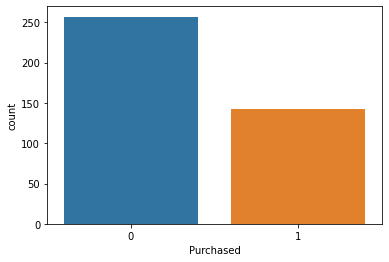

In [ ]:
sns.countplot(dff['Purchased'],label="count")

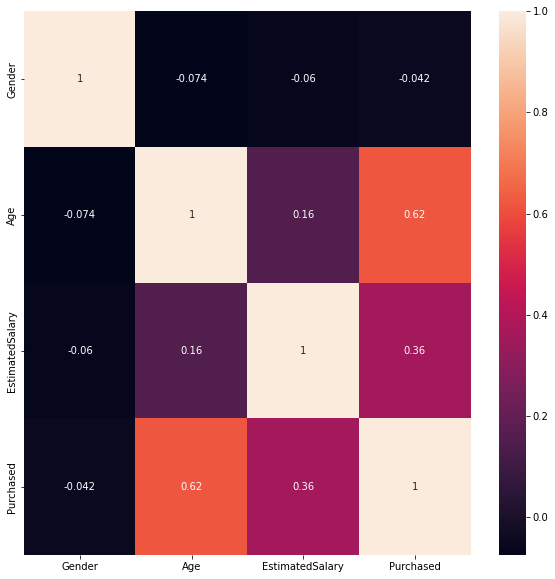

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dff.corr(), annot=True)

In [ ]:
x = dff.drop(['Purchased'], axis=1)
y = dff['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)


In [ ]:
def models(x_train, y_train):
  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train,y_train)

  # Decision Tree 
  from sklearn.tree import DecisionTreeClassifier
  tr = DecisionTreeClassifier()
  tr.fit(x_train,y_train)

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier()
  rf.fit(x_train,y_train)

  # KNN 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)

  # XGBoost
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train,y_train)

  print('LR: ', lr.score(x_train,y_train))
  print('DT: ', tr.score(x_train,y_train))
  print('RF: ', rf.score(x_train,y_train))
  print('KNN: ', knn.score(x_train,y_train))
  print('XGB: ', xgb.score(x_train,y_train))

  return lr,tr,rf,knn,xgb

In [ ]:
model = models(x_train,y_train)

LR:  0.83125
DT:  0.996875
RF:  0.996875
KNN:  0.909375
XGB:  0.940625


In [ ]:
y_pred = model[1].predict(x_test)
print(y_pred)

[0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for i in range(len(model)):
  print('Model', i)
  print('Accuracy: ', accuracy_score(y_test, model[i].predict(x_test)))
  print(classification_report(y_test, model[i].predict(x_test)))
  print(confusion_matrix(y_test, model[i].predict(x_test)))

Model 0
Accuracy:  0.9125
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.91      0.81      0.86        26

    accuracy                           0.91        80
   macro avg       0.91      0.89      0.90        80
weighted avg       0.91      0.91      0.91        80

[[52  2]
 [ 5 21]]
Model 1
Accuracy:  0.9125
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.88      0.85      0.86        26

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

[[51  3]
 [ 4 22]]
Model 2
Accuracy:  0.925
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.88      0.88      0.88        26

    accuracy                           0.93        80
   macro avg 

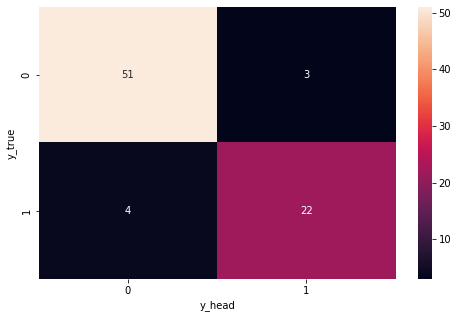

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()